In [1]:
# Set plot size (for jupyter notebook)
options(repr.plot.width  = 4, repr.plot.height = 3)

In [2]:
install.packages("ggpubr", repos='http://cran.us.r-project.org')

Installing package into '\\csce.datastore.ed.ac.uk/csce/maths/users/gkinnear/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gkinnear\AppData\Local\Temp\RtmpEPQPCp\downloaded_packages


In [3]:
mats

ERROR: Error in eval(expr, envir, enclos): object 'mats' not found


In [5]:
library(RColorBrewer)
suppressWarnings(source('h_mdt.R'))

library(ltm)
library(mirt)
library(xtable)
library(reshape2)
library(ggplot2)
theme_set(theme_bw())
library(ggrepel)
library(ggpubr)
source('f_IRT.R')

Warning message:
"package 'ltm' was built under R version 3.4.4"Loading required package: MASS
Loading required package: msm
Warning message:
"package 'msm' was built under R version 3.4.4"Loading required package: polycor
Warning message:
"package 'polycor' was built under R version 3.4.4"Warning message:
"package 'mirt' was built under R version 3.4.4"Loading required package: stats4
Loading required package: lattice

Attaching package: 'mirt'

The following object is masked from 'package:ltm':

    Science

Warning message:
"package 'xtable' was built under R version 3.4.4"Warning message:
"package 'ggrepel' was built under R version 3.4.4"Warning message:
"package 'ggpubr' was built under R version 3.4.4"Loading required package: magrittr


In [7]:
library(psych)
library(plyr)

In [13]:
## ----- Section 3.1 (Local independence) -----
# Determine number of respones in each question
# Observe frequency and check pairwise association
(dsc <- descript(mdt_clean[1:20]))


Descriptive statistics for the 'mdt_clean[1:20]' data-set

Sample:
 20 items and 3248 sample units; 0 missing values

Proportions for each level of response:
$Q1
     0    2.5      5 
0.0517 0.1413 0.8070 

$Q2
     0    2.5      5 
0.0976 0.0394 0.8630 

$Q3
     0      5 
0.3291 0.6709 

$Q4
     0    0.5      1    1.5      2    2.5      3    3.5      4    4.5      5 
0.0342 0.0009 0.0379 0.0114 0.0680 0.0317 0.1050 0.0631 0.1647 0.0305 0.4526 

$Q5
     0      5 
0.1635 0.8365 

$Q6
     0      2      3      5 
0.4723 0.3147 0.0068 0.2063 

$Q7
     0    2.5      5 
0.2374 0.0539 0.7087 

$Q8
     0      5 
0.3559 0.6441 

$Q9
     0      5 
0.1136 0.8864 

$Q10
     0    2.5      5 
0.2035 0.2589 0.5376 

$Q11
     0   1.25    2.5   3.75      5 
0.0323 0.0443 0.2097 0.0126 0.7010 

$Q12
     0      1      4      5 
0.1355 0.0628 0.0366 0.7651 

$Q13
     0      2      3      5 
0.1422 0.1561 0.0197 0.6820 

$Q14
     0      1      2      3      4      5 
0.2020 0.0619 0.3430 0.004

In [8]:
# Explore degree of pairwise associations
if (file.exists('../robject/IRT_cortest.Rdata')) {
  load('../robject/IRT_cortest.Rdata')
} else {
  cortest <- rcor.test(mdt_clean[1:20], method="kendall")
  save(cortest, file="../robject/IRT_cortest.Rdata")
}
cortest_sorted <- as.data.frame(cortest$p.values[order(-cortest$p.values[,'pvals']),])
cortest_sorted[,1:2] <- apply(cortest_sorted[,1:2], c(1,2), function (x) {
    group_pre17$Item[x]
})
# LaTeX: tab:IRT_cortest
print(xtable(head(cortest_sorted), digits=c(0,0,0,4), align=rep('c',4)), include.rownames=F)
subset(cortest_sorted, V1=='Q1' & V2=='Q15')
cortest$cor.mat['Q1','Q15']

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Mon Feb 04 16:02:45 2019
\begin{table}[ht]
\centering
\begin{tabular}{ccc}
  \hline
V1 & V2 & pvals \\ 
  \hline
Q3 & Q8 & 0.0139 \\ 
  Q2 & Q8 & 0.0015 \\ 
  Q1 & Q8 & 0.0006 \\ 
  Q2 & Q17 & 0.0002 \\ 
  Q8 & Q10 & 0.0002 \\ 
  Q1 & Q17 & 0.0001 \\ 
   \hline
\end{tabular}
\end{table}


,V1,V2,pvals
12,Q1,Q15,4.141687e-07


[1] 0.08234543

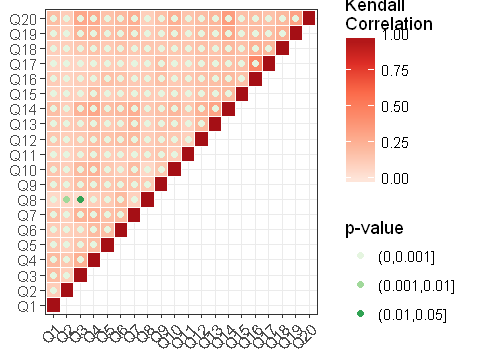

In [9]:
# pdf('../fig/IRT_cor_pre17.pdf', width=7, height=6)
mycor_plot(cortest, group_pre17)
# dev.off()

Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 


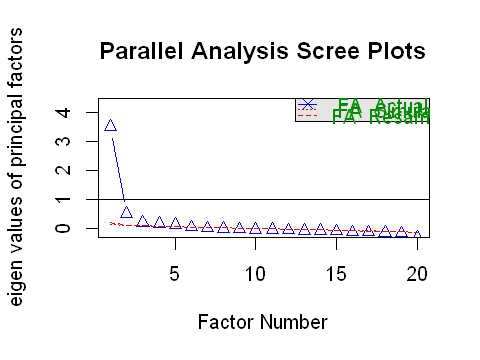

In [10]:
## ----- Section 3.2 Dimensionality (factor analysis) -----
# pdf('../fig/EFA_scree.pdf', width=7, height=4)
fp_pre17 <- fa.parallel(mdt_clean[1:20], fa='fa')
# dev.off()

In [11]:
# 1 factor
(efa_pre17_1 <- fa(mdt_clean[1:20], nfactors = 1))

Factor Analysis using method =  minres
Call: fa(r = mdt_clean[1:20], nfactors = 1)
Standardized loadings (pattern matrix) based upon correlation matrix
     MR1    h2   u2 com
Q1  0.35 0.124 0.88   1
Q2  0.23 0.054 0.95   1
Q3  0.42 0.177 0.82   1
Q4  0.54 0.288 0.71   1
Q5  0.36 0.127 0.87   1
Q6  0.40 0.164 0.84   1
Q7  0.46 0.208 0.79   1
Q8  0.26 0.065 0.93   1
Q9  0.38 0.143 0.86   1
Q10 0.41 0.171 0.83   1
Q11 0.31 0.095 0.90   1
Q12 0.43 0.186 0.81   1
Q13 0.45 0.201 0.80   1
Q14 0.61 0.370 0.63   1
Q15 0.36 0.127 0.87   1
Q16 0.42 0.177 0.82   1
Q17 0.37 0.134 0.87   1
Q18 0.41 0.169 0.83   1
Q19 0.50 0.249 0.75   1
Q20 0.55 0.302 0.70   1

                MR1
SS loadings    3.53
Proportion Var 0.18

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  190  and the objective function was  2.65 with Chi Square of  8586.08
The degrees of freedom for the model are 170  and the objective function was  0.38 

T

In [12]:
efa_pre17_1_load <- data.frame(Type=group_pre17$Type, MR1=efa_pre17_1$loadings[,1])
efa_pre17_1_load$sig[efa_pre17_1_load$MR1 > 0.25] <- "*"
# LaTeX: tab:EFA_pre17_1
print(xtable(efa_pre17_1_load[1:10,], digits=c(0,0,3,0), align=c('l','c','c','c')))
print(xtable(efa_pre17_1_load[11:20,], digits=c(0,0,3,0), align=c('l','c','c','c')))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Mon Feb 04 16:05:35 2019
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & sig \\ 
  \hline
Q1 & A & 0.353 & * \\ 
  Q2 & A & 0.233 &  \\ 
  Q3 & B & 0.421 & * \\ 
  Q4 & A & 0.537 & * \\ 
  Q5 & A & 0.356 & * \\ 
  Q6 & A & 0.405 & * \\ 
  Q7 & B & 0.456 & * \\ 
  Q8 & A & 0.256 & * \\ 
  Q9 & A & 0.378 & * \\ 
  Q10 & B & 0.414 & * \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Mon Feb 04 16:05:35 2019
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & sig \\ 
  \hline
Q11 & A & 0.309 & * \\ 
  Q12 & A & 0.432 & * \\ 
  Q13 & A & 0.448 & * \\ 
  Q14 & B & 0.608 & * \\ 
  Q15 & A & 0.357 & * \\ 
  Q16 & A & 0.421 & * \\ 
  Q17 & A & 0.366 & * \\ 
  Q18 & A & 0.411 & * \\ 
  Q19 & B & 0.499 & * \\ 
  Q20 & B & 0.550 & * \\ 
   \hline
\end{tabular}
\end{table}


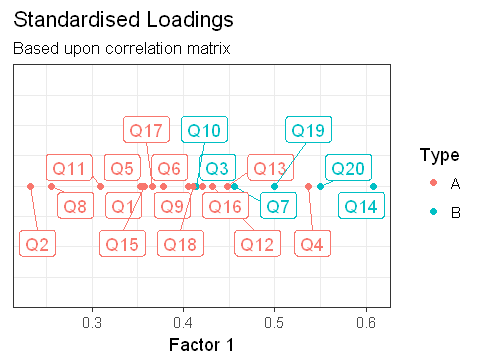

In [14]:
# pdf("../fig/EFA_pre17_1.pdf", width=7, height=2)
ggplot(efa_pre17_1_load, aes(x=MR1, y=rep(0,20), color=Type)) + 
  geom_point() + 
  geom_label_repel(aes(label = rownames(efa_pre17_1_load)), show.legend=F) +
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + 
  labs(x='Factor 1', 
       title='Standardised Loadings', 
       subtitle='Based upon correlation matrix')
# dev.off()

In [19]:
# 2 factor
(efa_pre17_2 <- fa(mdt_clean[1:20], nfactors = 2))

Factor Analysis using method =  minres
Call: fa(r = mdt_clean[1:20], nfactors = 2)
Standardized loadings (pattern matrix) based upon correlation matrix
      MR1   MR2    h2   u2 com
Q1   0.39 -0.04 0.138 0.86 1.0
Q2   0.23  0.02 0.055 0.94 1.0
Q3   0.51 -0.12 0.224 0.78 1.1
Q4   0.59 -0.06 0.325 0.68 1.0
Q5   0.33  0.06 0.126 0.87 1.1
Q6   0.36  0.08 0.162 0.84 1.1
Q7   0.52 -0.08 0.243 0.76 1.0
Q8   0.17  0.13 0.069 0.93 1.9
Q9   0.30  0.13 0.142 0.86 1.3
Q10  0.44 -0.02 0.186 0.81 1.0
Q11  0.26  0.09 0.094 0.91 1.2
Q12  0.36  0.13 0.184 0.82 1.2
Q13  0.37  0.13 0.198 0.80 1.2
Q14  0.59  0.05 0.376 0.62 1.0
Q15  0.24  0.20 0.137 0.86 1.9
Q16  0.06  0.61 0.415 0.59 1.0
Q17 -0.04  0.69 0.454 0.55 1.0
Q18  0.26  0.26 0.189 0.81 2.0
Q19  0.45  0.10 0.247 0.75 1.1
Q20  0.56  0.01 0.316 0.68 1.0

                       MR1  MR2
SS loadings           3.08 1.20
Proportion Var        0.15 0.06
Cumulative Var        0.15 0.21
Proportion Explained  0.72 0.28
Cumulative Proportion 0.72 1.00

 Wi

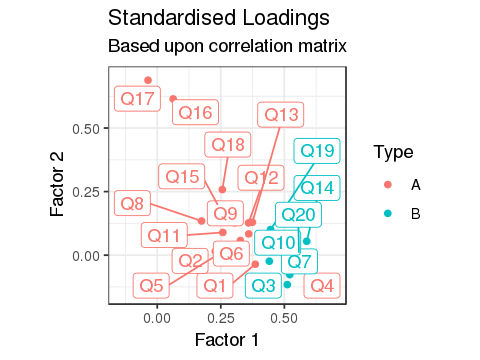

In [61]:
efa_pre17_2_load <- data.frame(Type=group_pre17$Type, MR1=efa_pre17_2$loadings[,1], MR2=efa_pre17_2$loadings[,2])
# pdf("../fig/EFA_pre17_2.pdf", width=7, height=5)
ggplot(efa_pre17_2_load, aes(x=MR1, y=MR2, color=Type)) + 
  geom_point() + 
  geom_label_repel(aes(label = rownames(efa_pre17_2_load)), show.legend=F) + 
  coord_fixed() + 
  scale_y_continuous(limits=c(-0.15,0.7)) + 
  scale_x_continuous(limits=c(-0.15,0.7)) + 
  labs(x='Factor 1', y='Factor 2', 
       title='Standardised Loadings', 
       subtitle='Based upon correlation matrix')
# dev.off()

In [35]:
efa_pre17_2_load[efa_pre17_2_load < 0.25] <- NA
# LaTeX: tab:EFA_pre17_2
print(xtable(efa_pre17_2_load[1:10,], digits=c(0,0,3,3), align=c('l','c','c','c')))
print(xtable(efa_pre17_2_load[11:20,], digits=c(0,0,3,3), align=c('l','c','c','c')))

Warning message in Ops.factor(left, right):
“‘<’ not meaningful for factors”

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 28 16:01:05 2018
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & MR2 \\ 
  \hline
Q1 & A & 0.386 &  \\ 
  Q2 & A &  &  \\ 
  Q3 & B & 0.512 &  \\ 
  Q4 & A & 0.592 &  \\ 
  Q5 & A & 0.327 &  \\ 
  Q6 & A & 0.360 &  \\ 
  Q7 & B & 0.521 &  \\ 
  Q8 & A &  &  \\ 
  Q9 & A & 0.305 &  \\ 
  Q10 & B & 0.441 &  \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 28 16:01:05 2018
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & MR2 \\ 
  \hline
Q11 & A & 0.258 &  \\ 
  Q12 & A & 0.359 &  \\ 
  Q13 & A & 0.374 &  \\ 
  Q14 & B & 0.588 &  \\ 
  Q15 & A &  &  \\ 
  Q16 & A &  & 0.615 \\ 
  Q17 & A &  & 0.688 \\ 
  Q18 & A & 0.256 & 0.258 \\ 
  Q19 & B & 0.446 &  \\ 
  Q20 & B & 0.557 &  \\ 
   \hline
\end{tabular}
\end{table}


In [36]:
## ----- Section 3.3 Model selection -----
# 1PL
coef_pre17_1PL <- suppressMessages(mirt(mdt_clean[1:20]*multi, 1, itemtype="gpcm", SE=T, gpcm_mats = mats, pars='values'))
con <- coef_pre17_1PL$parnum[coef_pre17_1PL$name=="a1"]
(fit_pre17_1PL <- suppressMessages(mirt(mdt_clean[1:20]*multi, 1, itemtype="gpcm", SE=T, gpcm_mats = mats, constrain=list(con))))

Iteration: 30, Log-Lik: -46516.463, Max-Change: 0.00001


Calculating information matrix...



Call:
mirt(data = mdt_clean[1:20] * multi, model = 1, itemtype = "gpcm", 
    SE = T, constrain = list(con), gpcm_mats = mats)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 30 EM iterations.
mirt version: 1.29 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Information matrix estimated with method: Oakes
Condition number of information matrix = 1102229
Second-order test: model is a possible local maximum

Log-likelihood = -46516.46
Estimated parameters: 69 
AIC = 93132.93; AICc = 93134.52
BIC = 93437.22; SABIC = 93278.34
G2 (4379443149) = 42499.63, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

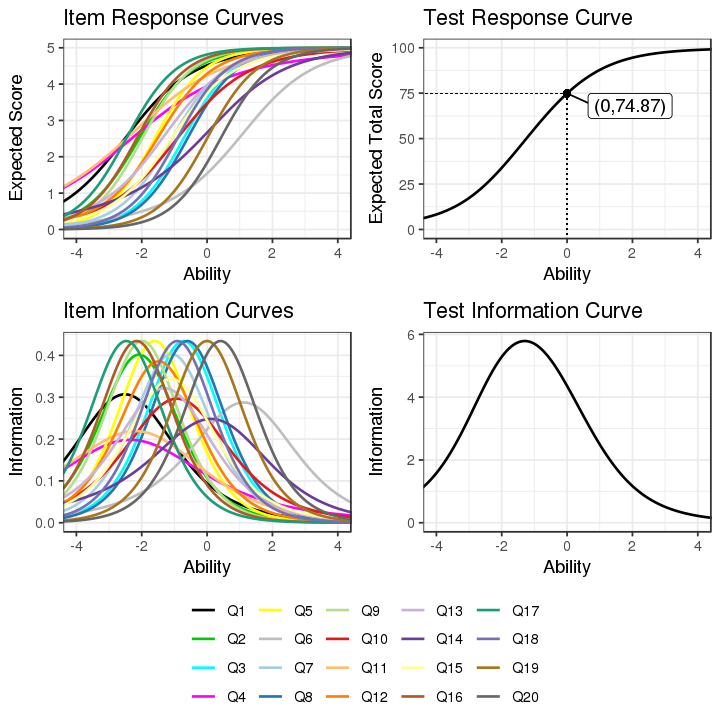

In [43]:
options(repr.plot.width  = 6, repr.plot.height = 6)
# pdf('../fig/IRT_pre17_1PL.pdf', width=7, onefile=F)
myggplot.mirt(fit_pre17_1PL, multi)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [16]:
# Goodness-of-fit
if (file.exists('../robject/IRT_pre17_1PL_bootgof.Rdata'))  {
    load('../robject/IRT_pre17_1PL_bootgof.Rdata')
} else {
    # Approx. 6 mins (consider running on remote server)
    gof_pre17_1PL <- mybootgof.mirt(fit_pre17_1PL, mats, B=199, list(con))
    save(gof_pre17_1PL, file="../robject/IRT_pre17_1PL_bootgof.Rdata")
}
gof_pre17_1PL

$Tobs
[1] 5368361900

$df
[1] 4379443149

$B
[1] 199

$p.value
[1] 0.12

In [53]:
df <- itemfit(fit_pre17_1PL)
df$sig <- cut(df$p.S_X2, c(0,0.001,0.01,0.05,0.1,1))
levels(df$sig) <- c('***','**','*','.','')
# LaTeX: tab:IRT_pre17_1PL_itemfit
print(xtable(df[1:10,], digits=c(0,0,1,0,3,0), align=c('l','l','r','r','c','l')), include.rownames=F)
print(xtable(df[11:20,], digits=c(0,0,1,0,3,0), align=c('l','l','r','r','c','l')), include.rownames=F)

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 28 16:58:28 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrcl}
  \hline
item & S\_X2 & df.S\_X2 & p.S\_X2 & sig \\ 
  \hline
Q1 & 79.2 & 72 & 0.262 &  \\ 
  Q2 & 139.9 & 66 & 0.000 & *** \\ 
  Q3 & 84.1 & 37 & 0.000 & *** \\ 
  Q4 & 352.8 & 206 & 0.000 & *** \\ 
  Q5 & 61.3 & 37 & 0.007 & ** \\ 
  Q6 & 109.2 & 67 & 0.001 & *** \\ 
  Q7 & 74.2 & 65 & 0.204 &  \\ 
  Q8 & 293.4 & 36 & 0.000 & *** \\ 
  Q9 & 32.5 & 38 & 0.723 &  \\ 
  Q10 & 75.4 & 70 & 0.308 &  \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 28 16:58:28 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrcl}
  \hline
item & S\_X2 & df.S\_X2 & p.S\_X2 & sig \\ 
  \hline
Q11 & 139.8 & 114 & 0.051 & . \\ 
  Q12 & 123.4 & 90 & 0.011 & * \\ 
  Q13 & 119.2 & 89 & 0.018 & * \\ 
  Q14 & 236.1 & 110 & 0.000 & *** \\ 
  Q15 & 284.9 & 110 & 0.000 & *** \\ 
  Q16 & 38.7 & 37 & 0.392 &  \\ 
  Q17 & 31

In [17]:
# GPCM
(fit_pre17_GPCM <- suppressMessages(mirt(mdt_clean[1:20]*multi, 1, itemtype="gpcm", SE=T, gpcm_mats = mats)))

Iteration: 33, Log-Lik: -46137.828, Max-Change: 0.00007


Calculating information matrix...



Call:
mirt(data = mdt_clean[1:20] * multi, model = 1, itemtype = "gpcm", 
    SE = T, gpcm_mats = mats)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 33 EM iterations.
mirt version: 1.29 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Information matrix estimated with method: Oakes
Condition number of information matrix = 338462.2
Second-order test: model is a possible local maximum

Log-likelihood = -46137.83
Estimated parameters: 69 
AIC = 92413.66; AICc = 92416.7
BIC = 92833.58; SABIC = 92614.33
G2 (4379443130) = 41742.36, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

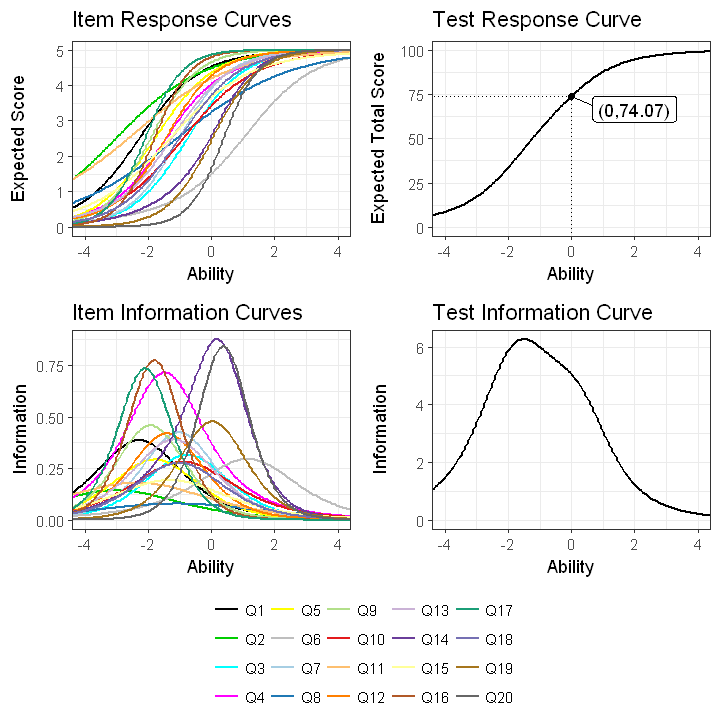

In [18]:
options(repr.plot.width  = 6, repr.plot.height = 6)
# pdf('../fig/IRT_pre17_GPCM.pdf', width=7, onefile=F)
myggplot.mirt(fit_pre17_GPCM, multi)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [19]:
# Goodness-of-fit
if (file.exists('../robject/IRT_pre17_GPCM_bootgof.Rdata'))  {
    load('../robject/IRT_pre17_GPCM_bootgof.Rdata')
} else {
    # Approx. 8 mins 20 secs (consider running on remote server)
    gof_pre17_GPCM <- mybootgof.mirt(fit_pre17_GPCM, mats, B=199)
    save(gof_pre17_GPCM, file="../robject/IRT_pre17_GPCM_bootgof.Rdata")
}
gof_pre17_GPCM

$Tobs
[1] 4848205700

$df
[1] 4379443130

$B
[1] 199

$p.value
[1] 0.135

In [58]:
df <- itemfit(fit_pre17_GPCM)
df$sig <- cut(df$p.S_X2, c(0,0.001,0.01,0.05,0.1,1))
levels(df$sig) <- c('***','**','*','.','')
# LaTeX: tab:IRT_pre17_GPCM_itemfit
print(xtable(df[1:10,], digits=c(0,0,1,0,3,0), align=c('l','l','r','r','c','l')), include.rownames=F)
print(xtable(df[11:20,], digits=c(0,0,1,0,3,0), align=c('l','l','r','r','c','l')), include.rownames=F)

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 28 17:28:44 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrcl}
  \hline
item & S\_X2 & df.S\_X2 & p.S\_X2 & sig \\ 
  \hline
Q1 & 74.8 & 71 & 0.355 &  \\ 
  Q2 & 81.3 & 69 & 0.147 &  \\ 
  Q3 & 58.3 & 37 & 0.014 & * \\ 
  Q4 & 230.3 & 186 & 0.015 & * \\ 
  Q5 & 43.1 & 39 & 0.300 &  \\ 
  Q6 & 101.7 & 68 & 0.005 & ** \\ 
  Q7 & 69.7 & 65 & 0.321 &  \\ 
  Q8 & 31.7 & 39 & 0.791 &  \\ 
  Q9 & 32.1 & 38 & 0.740 &  \\ 
  Q10 & 68.8 & 70 & 0.517 &  \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 28 17:28:44 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrcl}
  \hline
item & S\_X2 & df.S\_X2 & p.S\_X2 & sig \\ 
  \hline
Q11 & 129.1 & 115 & 0.174 &  \\ 
  Q12 & 123.4 & 90 & 0.011 & * \\ 
  Q13 & 120.4 & 90 & 0.018 & * \\ 
  Q14 & 127.9 & 102 & 0.043 & * \\ 
  Q15 & 214.3 & 120 & 0.000 & *** \\ 
  Q16 & 45.9 & 36 & 0.124 &  \\ 
  Q17 & 36.0 & 35 & 0.420 & 

In [22]:
# LaTeX: tab:IRT_anova
print(xtable(anova(fit_pre17_1PL, fit_pre17_GPCM), digits=c(rep(0,9), 4), align=rep("c",10)))


Model 1: mirt(data = mdt_clean[1:20] * multi, model = 1, itemtype = "gpcm", 
    SE = T, constrain = list(con), gpcm_mats = mats)
Model 2: mirt(data = mdt_clean[1:20] * multi, model = 1, itemtype = "gpcm", 
    SE = T, gpcm_mats = mats)

% latex table generated in R 3.5.1 by xtable 1.8-2 package
% Sat Aug 18 23:40:44 2018
\begin{table}[ht]
\centering
\begin{tabular}{cccccccccc}
  \hline
 & AIC & AICc & SABIC & HQ & BIC & logLik & X2 & df & p \\ 
  \hline
1 & 93133 & 93135 & 93278 & 93242 & 93437 & -46516 &  &  &  \\ 
  2 & 92414 & 92417 & 92614 & 92564 & 92834 & -46138 & 757 & 19 & 0.0000 \\ 
   \hline
\end{tabular}
\end{table}


In [23]:
## ----- Section 3.4.1 Difficulty and discrimination -----
# pdf("../fig/IRT_pre17_GPCM_irf.pdf", width=7, height=6)
# myggplot.irf(fit_pre17_GPCM, multi)
# dev.off()

In [24]:
# LaTeX: tab:IRT_pre17_expscore
irf_pre17 <- myexpected.mirt(fit_pre17_GPCM, z=c(-2,0,2))/multi
irf_pre17[1,] <- irf_pre17[1,]-irf_pre17[2,]
irf_pre17[3,] <- irf_pre17[3,]-irf_pre17[2,]
irf_pre17 <- rbind(irf_pre17, irf_pre17[3,]-irf_pre17[1,])
print(xtable(addmargins(t(irf_pre17), margin=1), digits=c(0,2,2,2,2), align=rep('c',5)))

% latex table generated in R 3.5.1 by xtable 1.8-2 package
% Sat Aug 18 23:40:44 2018
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
 & 1 & 2 & 3 & 4 \\ 
  \hline
Q1 & -1.65 & 4.53 & 0.37 & 2.02 \\ 
  Q2 & -1.09 & 4.49 & 0.36 & 1.46 \\ 
  Q3 & -2.52 & 3.52 & 1.27 & 3.78 \\ 
  Q4 & -2.27 & 4.05 & 0.71 & 2.99 \\ 
  Q5 & -2.14 & 4.37 & 0.54 & 2.69 \\ 
  Q6 & -1.04 & 1.52 & 2.05 & 3.09 \\ 
  Q7 & -2.77 & 3.93 & 0.94 & 3.71 \\ 
  Q8 & -1.36 & 3.25 & 1.00 & 2.36 \\ 
  Q9 & -2.27 & 4.66 & 0.32 & 2.59 \\ 
  Q10 & -2.05 & 3.44 & 1.15 & 3.20 \\ 
  Q11 & -1.22 & 4.21 & 0.54 & 1.76 \\ 
  Q12 & -2.57 & 4.29 & 0.62 & 3.19 \\ 
  Q13 & -2.40 & 3.98 & 0.86 & 3.25 \\ 
  Q14 & -1.98 & 2.59 & 2.17 & 4.15 \\ 
  Q15 & -1.83 & 3.68 & 0.92 & 2.76 \\ 
  Q16 & -2.71 & 4.80 & 0.19 & 2.90 \\ 
  Q17 & -2.14 & 4.87 & 0.13 & 2.27 \\ 
  Q18 & -2.41 & 3.73 & 1.07 & 3.48 \\ 
  Q19 & -2.18 & 2.46 & 2.23 & 4.41 \\ 
  Q20 & -1.62 & 1.68 & 3.08 & 4.70 \\ 
  Sum & -40.21 & 74.07 & 20.53 & 60.75 \\ 
   \hline
\

In [25]:
# LaTeX: tab:IRT_pre17_scoreprop
print(xtable(do.call(rbind, lapply(mdt_clean[c(2,11,19,20)], function (x) {
    x <- factor(x, levels=c('0','1.25','2.5','3.75','5'))
    prop.table(table(x)) * 100
})), digits=c(0,1,1,1,1,1)))

% latex table generated in R 3.5.1 by xtable 1.8-2 package
% Sat Aug 18 23:40:44 2018
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrr}
  \hline
 & 0 & 1.25 & 2.5 & 3.75 & 5 \\ 
  \hline
Q2 & 9.8 & 0.0 & 3.9 & 0.0 & 86.3 \\ 
  Q11 & 3.2 & 4.4 & 21.0 & 1.3 & 70.1 \\ 
  Q19 & 50.1 & 0.0 & 0.0 & 0.0 & 49.9 \\ 
  Q20 & 60.2 & 0.0 & 0.0 & 0.0 & 39.8 \\ 
   \hline
\end{tabular}
\end{table}


In [40]:
## ----- Section 3.4.2 information -----
# pdf("../fig/IRT_pre17_GPCM_info.pdf", width=7, height=6)
# myggplot.info(fit_pre17_GPCM, multi)
# dev.off()

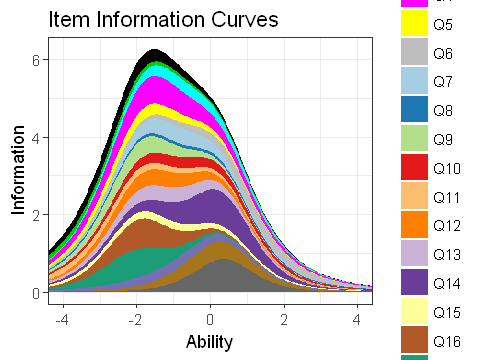

In [20]:
# pdf("../fig/IRT_pre17_GPCM_stackinfo.pdf", width=7, height=6)
myggplot.stackinfo(fit_pre17_GPCM)
# dev.off()

In [63]:
# LaTeX: tab:IRT_pre17_summarytif
majorinfo_sum <- mysummaryinfo.mirt(fit_pre17_GPCM, type='major', each=F)
totalinfo_sum <- mysummaryinfo.mirt(fit_pre17_GPCM, type='total', each=F)
print(xtable(cbind(majorinfo_sum, totalinfo_sum[2:4]), digits=c(0,rep(2,7))))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Sun Sep 30 15:06:32 2018
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & MaxInfo.z & LowerMajor.info & UpperMajor.info & Major.info & Lower.info & Upper.info & Total.info \\ 
  \hline
1 & -1.52 & 11.70 & 6.19 & 17.89 & 20.77 & 7.60 & 28.37 \\ 
   \hline
\end{tabular}
\end{table}


In [64]:
# LaTeX: tab:IRT_pre17_summaryiif
majorinfo_each <- mysummaryinfo.mirt(fit_pre17_GPCM, type='major')
totalinfo_each <- mysummaryinfo.mirt(fit_pre17_GPCM, type='total')
print(xtable(cbind(majorinfo_each, totalinfo_each[2:4]), digits=c(0,rep(2,7))))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Sun Sep 30 15:07:17 2018
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & MaxInfo.z & LowerMajor.info & UpperMajor.info & Major.info & Lower.info & Upper.info & Total.info \\ 
  \hline
Q1 & -2.30 & 0.49 & 0.11 & 0.60 & 1.35 & 0.14 & 1.49 \\ 
  Q2 & -3.04 & 0.17 & 0.06 & 0.23 & 0.70 & 0.08 & 0.78 \\ 
  Q3 & -0.77 & 0.57 & 0.28 & 0.85 & 0.79 & 0.33 & 1.12 \\ 
  Q4 & -1.49 & 1.21 & 0.38 & 1.59 & 2.15 & 0.51 & 2.66 \\ 
  Q5 & -1.80 & 0.46 & 0.12 & 0.58 & 0.95 & 0.14 & 1.08 \\ 
  Q6 & 1.13 & 0.28 & 0.55 & 0.83 & 0.41 & 0.93 & 1.34 \\ 
  Q7 & -1.04 & 0.75 & 0.26 & 1.00 & 1.06 & 0.29 & 1.35 \\ 
  Q8 & -1.11 & 0.15 & 0.11 & 0.26 & 0.36 & 0.20 & 0.56 \\ 
  Q9 & -1.93 & 0.62 & 0.09 & 0.70 & 1.26 & 0.09 & 1.35 \\ 
  Q10 & -0.91 & 0.52 & 0.30 & 0.82 & 0.88 & 0.40 & 1.28 \\ 
  Q11 & -2.36 & 0.29 & 0.13 & 0.42 & 1.00 & 0.19 & 1.19 \\ 
  Q12 & -1.42 & 0.71 & 0.17 & 0.88 & 1.18 & 0.20 & 1.37 \\ 
  Q13 & -1.20 & 0.70 & 0.25 

In [110]:
# LaTeX: tab:IRT_pre17_info
info_pre17 <- rbind.fill(lapply(1:20, function (x) {
    myareainfo.mirt(fit_pre17_GPCM, zrange=c(-2,2), which.items=x)[c('Info', 'TotalInfo')]
}))
info_pre17_major <- data.frame(group_pre17, 
                               MajorInfo=info_pre17$Info, 
                               Prop=prop.table(info_pre17$Info)*100)
info_pre17_total <- data.frame(group_pre17, 
                               TotalInfo=info_pre17$TotalInfo, 
                               Prop=prop.table(info_pre17$TotalInfo)*100)
print(xtable(arrange(info_pre17_major, Prop)), include.rownames=F)
print(xtable(arrange(info_pre17_total, Prop)), include.rownames=F)

% latex table generated in R 3.5.1 by xtable 1.8-2 package
% Sun Aug 19 19:11:33 2018
\begin{table}[ht]
\centering
\begin{tabular}{llrr}
  \hline
Item & Group & MajorInfo & Prop \\ 
  \hline
Q2 & A & 0.23 & 1.28 \\ 
  Q8 & A & 0.26 & 1.48 \\ 
  Q11 & A & 0.42 & 2.33 \\ 
  Q15 & A & 0.54 & 3.02 \\ 
  Q5 & A & 0.58 & 3.25 \\ 
  Q1 & A & 0.60 & 3.37 \\ 
  Q9 & A & 0.70 & 3.92 \\ 
  Q18 & A & 0.73 & 4.09 \\ 
  Q17 & A & 0.78 & 4.35 \\ 
  Q10 & B & 0.82 & 4.58 \\ 
  Q6 & A & 0.83 & 4.62 \\ 
  Q3 & B & 0.85 & 4.75 \\ 
  Q12 & A & 0.88 & 4.90 \\ 
  Q13 & A & 0.95 & 5.29 \\ 
  Q7 & B & 1.00 & 5.62 \\ 
  Q16 & A & 1.02 & 5.71 \\ 
  Q19 & B & 1.22 & 6.81 \\ 
  Q4 & A & 1.59 & 8.88 \\ 
  Q20 & B & 1.72 & 9.64 \\ 
  Q14 & B & 2.17 & 12.11 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.5.1 by xtable 1.8-2 package
% Sun Aug 19 19:11:33 2018
\begin{table}[ht]
\centering
\begin{tabular}{llrr}
  \hline
Item & Group & TotalInfo & Prop \\ 
  \hline
Q8 & A & 0.56 & 1.97 \\ 
  Q2 & 

In [201]:
## ----- Section 3.4.3 (Ability estimates) -----
eap_pre17 <- fscores(fit_pre17_GPCM, full.scores.SE = T)

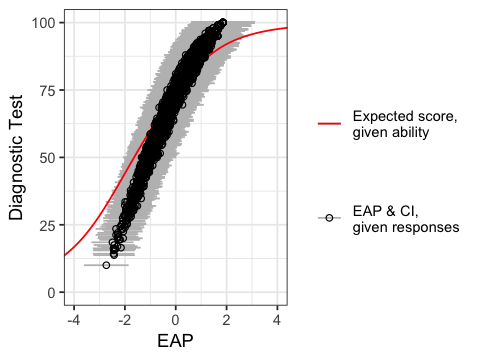

In [306]:
dtvseap.df <- data.frame(DT=mdt_clean$Total, 
                         EAP=eap_pre17[,'F1'], 
                         EAP.lower=eap_pre17[,'F1'] - eap_pre17[,'SE_F1']*qnorm(0.975), 
                         EAP.upper=eap_pre17[,'F1'] + eap_pre17[,'SE_F1']*qnorm(0.975))
expvseap.df <- data.frame(Exp=rowSums(myexpected.mirt(fit_pre17_GPCM)/multi), EAP=seq(-5,5,length=201))
# pdf('../fig/IRT_pre17_EAP.pdf', width=7, height=5)
# Dummy fill and col used, for separating legends
ggplot(dtvseap.df, aes(EAP, DT, fill='EAP & CI,\ngiven responses')) +
    geom_segment(aes(x=EAP.lower, xend=EAP.upper, y=DT, yend=DT), colour='gray', show.legend=T) + 
    geom_line(data=expvseap.df, aes(EAP, Exp, col='Expected score,\ngiven ability')) + 
    geom_point(shape=1) + 
    scale_colour_manual(values='red', '') + 
    scale_fill_manual(values=1, '') + 
    coord_cartesian(xlim=c(-4,4), ylim=c(0,100)) + 
    labs(y='Diagnostic Test')
# dev.off()

In [469]:
sum(mdt_clean$Total==100)
max(eap_pre17[,'F1'])

[1] 76

[1] 1.858034

In [327]:
## ----- Section 3.5 (Academic growth)-----
fit_14 <- suppressMessages(mirt(mdt14_clean[1:20]*multi, 1, itemtype="gpcm", SE=T, gpcm_mats = mats))

Iteration: 32, Log-Lik: -13852.077, Max-Change: 0.00005


Calculating information matrix...


In [479]:
# Convert response pattern to ordinal for fscore
# Add missing category for Q4 (0.5 marks -> cat 1)
resp_13 <- sapply(mdt13_clean[,1:20], function (x) {
    as.numeric(factor(x))-1
})
resp_13[resp_13[,4]>0, 4] <- resp_13[resp_13[,4]>0, 4] + 1
resp_15 <- sapply(mdt15_clean[,1:20], function (x) {
    as.numeric(factor(x))-1
})
resp_15[resp_15[,4]>0, 4] <- resp_15[resp_15[,4]>0, 4] + 1
resp_16 <- sapply(mdt16_clean[,1:20], function (x) {
    as.numeric(factor(x))-1
})
resp_16[resp_16[,4]>0, 4] <- resp_16[resp_16[,4]>0, 4] + 1

In [531]:
eap_13 <- fscores(fit_14, method='EAP', response.pattern = resp_13)
eap_14 <- fscores(fit_14, method='EAP', response.pattern = extract.mirt(fit_14, 'data'))
eap_15 <- fscores(fit_14, method='EAP', response.pattern = resp_15)
eap_16 <- fscores(fit_14, method='EAP', response.pattern = resp_16)

In [532]:
joint_13 <- merge(mdt13_clean, demogr, by='AnonID', all.x=T)
joint_14 <- merge(mdt14_clean, demogr, by='AnonID', all.x=T)
joint_15 <- merge(mdt15_clean, demogr, by='AnonID', all.x=T)
joint_16 <- merge(mdt16_clean, demogr, by='AnonID', all.x=T)

In [533]:
joint_13$F1 <- eap_13[,'F1']
joint_13$SE_F1 <- eap_13[,'SE_F1']
joint_13$Year <- 2013
joint_14$F1 <- eap_14[,'F1']
joint_14$SE_F1 <- eap_14[,'SE_F1']
joint_14$Year <- 2014
joint_15$F1 <- eap_15[,'F1']
joint_15$SE_F1 <- eap_15[,'SE_F1']
joint_15$Year <- 2015
joint_16$F1 <- eap_16[,'F1']
joint_16$SE_F1 <- eap_16[,'SE_F1']
joint_16$Year <- 2016

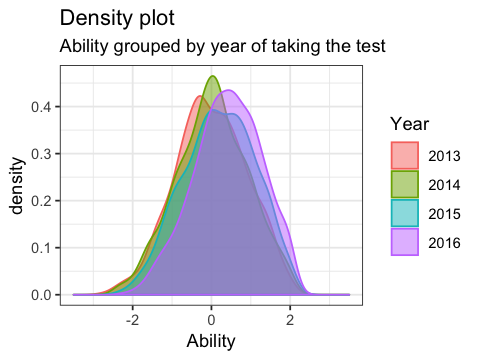

In [534]:
eap.df <- rbind(joint_13, joint_14, joint_15, joint_16)
# pdf("../fig/GRTH_density.pdf", width=7, height=4)
ggplot(eap.df, aes(F1, fill=as.factor(Year), colour=as.factor(Year))) +
    geom_density(alpha=0.5) + 
    scale_x_continuous(limits=c(-3.5,3.5)) +
    labs(title="Density plot", 
         subtitle="Ability grouped by year of taking the test", 
         x="Ability", 
         fill='Year', colour='Year')
# dev.off()

In [462]:
eap.dsc <- rbind(describe(eap.df[eap.df$Year==2013,]$F1), 
                 describe(eap.df[eap.df$Year==2014,]$F1), 
                 describe(eap.df[eap.df$Year==2015,]$F1), 
                 describe(eap.df[eap.df$Year==2016,]$F1))[,c(2,3,4,8,9,11,12)]
rownames(eap.dsc) <- 2013:2016
print(xtable(eap.dsc, digits=c(0,0,2,2,2,2,2,2)))

% latex table generated in R 3.5.1 by xtable 1.8-2 package
% Mon Aug 20 16:53:10 2018
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & n & mean & sd & min & max & skew & kurtosis \\ 
  \hline
2013 & 832 & -0.01 & 0.90 & -2.75 & 1.97 & -0.09 & -0.37 \\ 
  2014 & 942 & 0.02 & 0.90 & -2.37 & 1.97 & -0.08 & -0.35 \\ 
  2015 & 729 & 0.20 & 0.90 & -2.28 & 1.97 & -0.15 & -0.59 \\ 
  2016 & 763 & 0.41 & 0.85 & -2.19 & 1.97 & -0.23 & -0.41 \\ 
   \hline
\end{tabular}
\end{table}


In [550]:
ks1314 <- ks.test(eap_13[,'F1'], eap_14[,'F1'])
ks1415 <- ks.test(eap_14[,'F1'], eap_15[,'F1'])
ks1516 <- ks.test(eap_15[,'F1'], eap_16[,'F1'])
ks.df <- data.frame(statistic=c(ks1314$statistic, ks1415$statistic, ks1516$statistic), 
                    p.value=c(ks1314$p.value, ks1415$p.value, ks1516$p.value))
rownames(ks.df) <- c('13/14', '14/15', '15/16')
print(xtable(ks.df, digits=c(0,4,4)))

Warning message in ks.test(eap_13[, "F1"], eap_14[, "F1"]):
“p-value will be approximate in the presence of ties”Warning message in ks.test(eap_14[, "F1"], eap_15[, "F1"]):
“p-value will be approximate in the presence of ties”Warning message in ks.test(eap_15[, "F1"], eap_16[, "F1"]):
“p-value will be approximate in the presence of ties”

% latex table generated in R 3.5.1 by xtable 1.8-2 package
% Mon Aug 20 21:50:56 2018
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & statistic & p.value \\ 
  \hline
13/14 & 0.0542 & 0.1498 \\ 
  14/15 & 0.1124 & 0.0001 \\ 
  15/16 & 0.1107 & 0.0002 \\ 
   \hline
\end{tabular}
\end{table}


In [548]:
ks1314


	Two-sample Kolmogorov-Smirnov test

data:  eap_13[, "F1"] and eap_14[, "F1"]
D = 0.05415, p-value = 0.1498
alternative hypothesis: two-sided


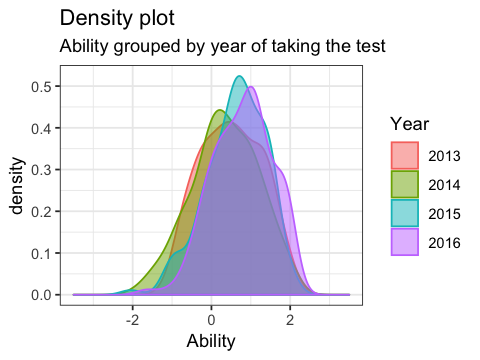

In [535]:
ggplot(subset(eap.df, School=='Mathematics'), aes(F1, fill=as.factor(Year), colour=as.factor(Year))) +
    geom_density(alpha=0.5) + 
    scale_x_continuous(limits=c(-3.5,3.5)) +
    labs(title="Density plot", 
         subtitle="Ability grouped by year of taking the test", 
         x="Ability", 
         fill='Year', colour='Year')

In [536]:
ks.test(joint_13$F1[joint_13$School=='Mathematics'], joint_14$F1[joint_14$School=='Mathematics'])
ks.test(joint_14$F1[joint_14$School=='Mathematics'], joint_15$F1[joint_15$School=='Mathematics'])
ks.test(joint_15$F1[joint_15$School=='Mathematics'], joint_16$F1[joint_16$School=='Mathematics'])

Warning message in ks.test(joint_13$F1[joint_13$School == "Mathematics"], joint_14$F1[joint_14$School == :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  joint_13$F1[joint_13$School == "Mathematics"] and joint_14$F1[joint_14$School == "Mathematics"]
D = 0.086508, p-value = 0.7471
alternative hypothesis: two-sided


Warning message in ks.test(joint_14$F1[joint_14$School == "Mathematics"], joint_15$F1[joint_15$School == :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  joint_14$F1[joint_14$School == "Mathematics"] and joint_15$F1[joint_15$School == "Mathematics"]
D = 0.20761, p-value = 0.005986
alternative hypothesis: two-sided


Warning message in ks.test(joint_15$F1[joint_15$School == "Mathematics"], joint_16$F1[joint_16$School == :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  joint_15$F1[joint_15$School == "Mathematics"] and joint_16$F1[joint_16$School == "Mathematics"]
D = 0.12542, p-value = 0.2215
alternative hypothesis: two-sided


In [541]:
anova(lm(F1 ~ as.factor(Year), data=subset(eap.df, School=='Mathematics' & (Year==2015 | Year==2016))))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
as.factor(Year),1,1.973686,1.973686,3.50174,0.0623546
Residuals,278,156.689143,0.563630,NA,NA


In [434]:
anova(lm(F1 ~ as.factor(Year), data=subset(eap.df, Year==2015|Year==2016)))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
as.factor(Year),1,16.81482,16.8148206,21.8918,3.146228e-06
Residuals,1490,1144.45073,0.7680877,NA,NA


In [477]:
library(plyr)
library(reshape2)
source('h_joindata.R')

In [551]:
?ks.test

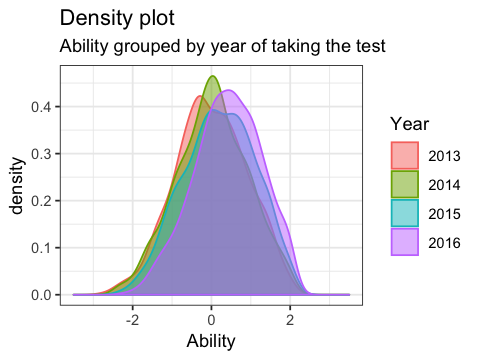

In [482]:
eap.df <- data.frame(rbind(eap_13, eap_14, eap_15, eap_16)[,c('F1', 'SE_F1')])
eap.df <- cbind(eap.df, Year=c(rep(2013, nrow(eap_13)), 
                               rep(2014, nrow(eap_14)), 
                               rep(2015, nrow(eap_15)), 
                               rep(2016, nrow(eap_16))))
# pdf("../fig/GRTH_density.pdf", width=7, height=4)
ggplot(eap.df, aes(F1, fill=as.factor(Year), colour=as.factor(Year))) +
    geom_density(alpha=0.5) + 
    scale_x_continuous(limits=c(-3.5,3.5)) +
    labs(title="Density plot", 
         subtitle="Ability grouped by year of taking the test", 
         x="Ability", 
         fill='Year', colour='Year')
# dev.off()